## Stage 4

This is a Vigenere Cipher.

In [1]:
import operator
from collections import Counter
from itertools import islice

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = open("./cipher.txt")

# It is a one line :)
lines = f.readlines()

This is the cipher text:

In [3]:
cipher_text = ''
for line in lines:
    if len(line) > 1:
        cipher_text += line.strip().replace(' ', '')
print(cipher_text)

KQOWEFVJPUJUUNUKGLMEKJINMWUXFQMKJBGWRLFNFGHUDWUUMBSVLPSNCMUEKQCTESWREEKOYSSIWCTUAXYOTAPXPLWPNTCGOJBGFQHTDWXIZAYGFFNSXCSEYNCTSSPNTUJNYTGGWZGRWUUNEJUUQEAPYMEKQHUIDUXFPGUYTSMTFFSHNUOCZGMRUWEYTRGKMEEDCTVRECFBDJQCUSWVBPNLGOYLSKMTEFVJJTWWMFMWPNMEMTMHRSPXFSSKFFSTNUOCZGMDOEOYEEKCPJRGPMURSKHFRSEIUEVGOYCWXIZAYGOSAANYDOEOYJLWUNHAMEBFELXYVLWNOJNSIOFRWUCCESWKVIDGMUCGOCRUWGNMAAFFVNSIUDEKQHCEUCPFCMPVSUDGAVEMNYMAMVLFMAOYFNTQCUAFVFJNXKLNEIWCWODCCULWRIFTWGMUSWOVMATNYBUHTCOCWFYTNMGYTQMKBBNLGFBTWOJFTWGNTEJKNEEDCLDHWTVBUVGFBIJGYYIDGMVRDGMPLSWGJLAGOEEKJOFEKNYNOLRIVRWVUHEIWUURWGMUTJCDBNKGMBIDGMEEYGUOTDGGQEUJYOTVGGBRUJYS


First step to solving a Vigenere Cipher is to try to find out the number of letters in the key. For that, we'll try to find repetition of sequences along the cipher text, we'll start with repetitions of four letter sequences:

In [4]:
def window(seq, n):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

The following sequence repeat, and their respective positions.

In [5]:
n = 4

repetitions = {}
for i, seq in enumerate(window(cipher_text, n)):
    seq = ''.join(seq)
    if seq not in repetitions:
        repetitions[seq] = []
    
    repetitions[seq].append(i)

repetitions = { k: p for k, p in repetitions.items() if len(p) > 1 }
repetitions

{'CZGM': [179, 259],
 'DOEO': [263, 308],
 'EEDC': [193, 493],
 'EFVJ': [4, 224],
 'EKQH': [154, 374],
 'FTWG': [438, 483],
 'IDGM': [349, 514, 574],
 'IZAY': [107, 297],
 'NUOC': [176, 256],
 'OCZG': [178, 258],
 'OEOY': [264, 309],
 'UOCZ': [177, 257],
 'WGMU': [440, 560],
 'WXIZ': [105, 295],
 'XIZA': [106, 296],
 'ZAYG': [108, 298]}

In [6]:
def factors_of(n):
    # Not pretty, but works.
    factors = []
    
    for i in range(1, n+1):
        if n%i == 0:
            factors.append(i)
                   
    return factors

Let's compile a possible factors table for the differences between the repetitions.

In [7]:
factors_list = {}
all_factors = set()
for seq, indices in repetitions.items():
    for i, pair in enumerate(window(indices, 2)):
        factors = factors_of(pair[1] - pair[0])
        factors_list['{}{}'.format(seq, i if i > 0 else '')] = factors
        all_factors = all_factors.union(set(factors))

df = pd.DataFrame(index=factors_list.keys(), columns=list(all_factors)).fillna(0)

for seq, factors in factors_list.items():
    for factor in factors:
        df.loc[seq, factor] += 1
df

,1,2,3,4,5,6,8,9,10,11,...,55,60,190,75,80,220,95,100,110,120
IDGM1,1,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
EFVJ,1,1,0,1,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
IZAY,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
XIZA,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
IDGM,1,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
NUOC,1,1,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
CZGM,1,1,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
UOCZ,1,1,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
OEOY,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
EKQH,1,1,0,1,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0


Next we find the factors that comply with all the repetitions.

In [8]:
sums = df.sum(0)
sums[sums == len(factors_list)]

1    17
5    17
dtype: int64

The key can either be 1 or 5 letters long. Let's assume it is five. So the key is of the format `L_0 L_1 L_2 L_3 L_4`.

In [9]:
key_length = 5
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Initialize letter counts.
cipher_alphabets = {}
for k in range(key_length):
    cipher_alphabet_key = 'L_{}'.format(k)
    cipher_alphabets[cipher_alphabet_key] = {l: 0 for l in letters}

# Count letters.
for i, cipher_letter in enumerate(cipher_text):
    k = i % key_length
    cipher_alphabet_key = 'L_{}'.format(k)
    cipher_alphabets[cipher_alphabet_key][cipher_letter] +=1 

# Consolidate numbers
for cipher_alphabet_key, cipher_alphabet in cipher_alphabets.items():
    s = sum(cipher_alphabet.values())
    cipher_alphabets[cipher_alphabet_key] = sorted([(l, v / s * 100) for l, v in cipher_alphabet.items()], key=operator.itemgetter(0))
    
cipher_alphabets = sorted([(k, a) for k, a in cipher_alphabets.items()], key=operator.itemgetter(0))

Next, we'll run the letter frequency analysis for every five letters in the cipher text.

In [10]:
# https://en.wikipedia.org/wiki/Letter_frequency
english_frequency = [
    ('a', 8.167),
    ('b', 1.492),
    ('c', 2.782),
    ('d', 4.253),
    ('e', 12.702),
    ('f', 2.228),
    ('g', 2.015),
    ('h', 6.094),
    ('i', 6.966),
    ('j', 0.153),
    ('k', 0.772),
    ('l', 4.025),
    ('m', 2.406),
    ('n', 6.749),
    ('o', 7.507),
    ('p', 1.929),
    ('q', 0.095),
    ('r', 5.987),
    ('s', 6.327),
    ('t', 9.056),
    ('u', 2.758),
    ('v', 0.978),
    ('w', 2.360),
    ('x', 0.150),
    ('y', 1.974),
    ('z', 0.074)
]

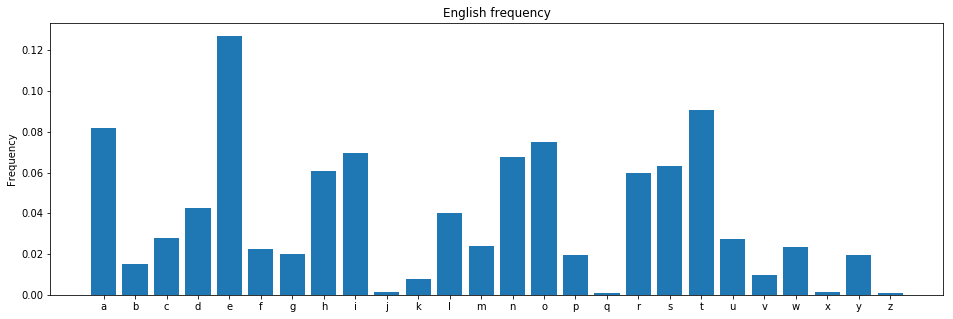

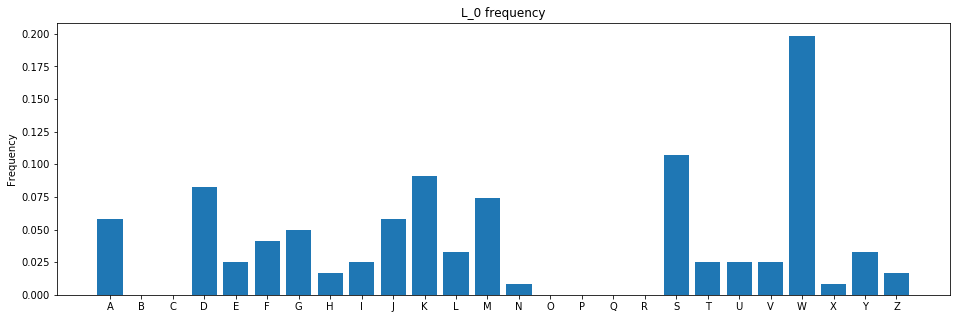

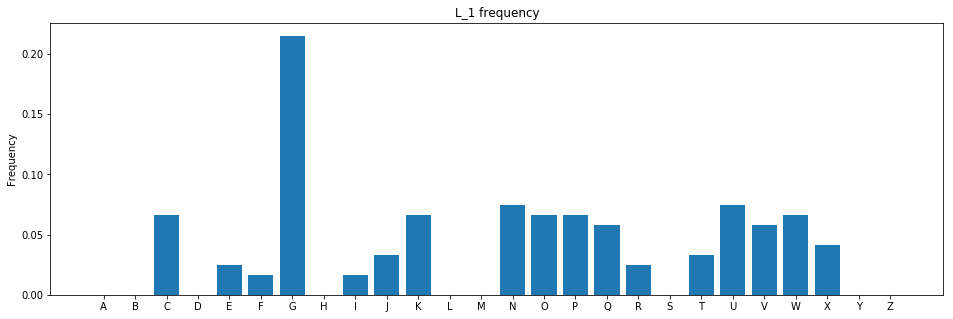

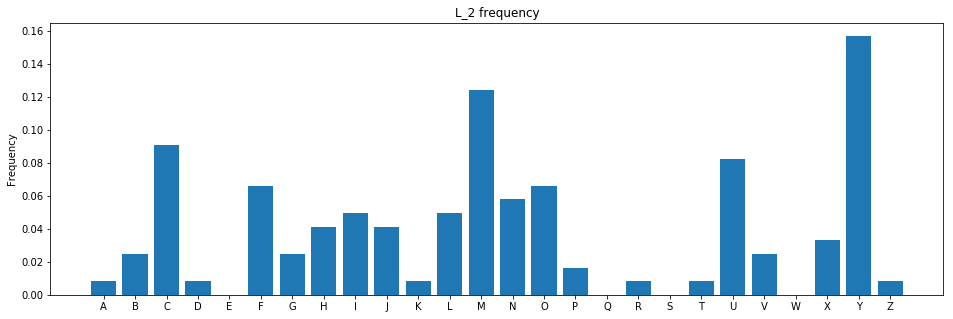

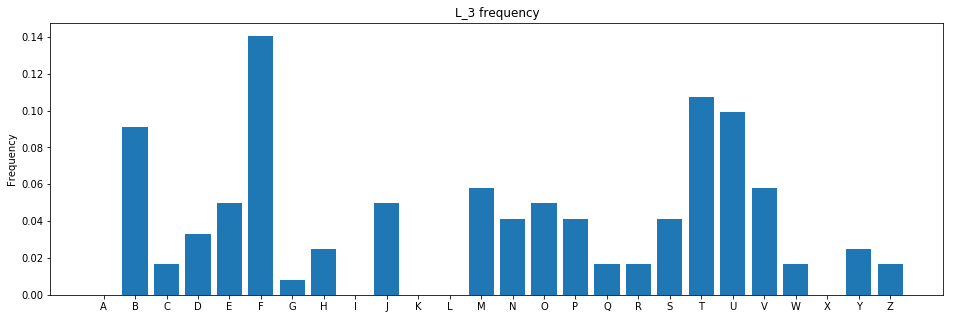

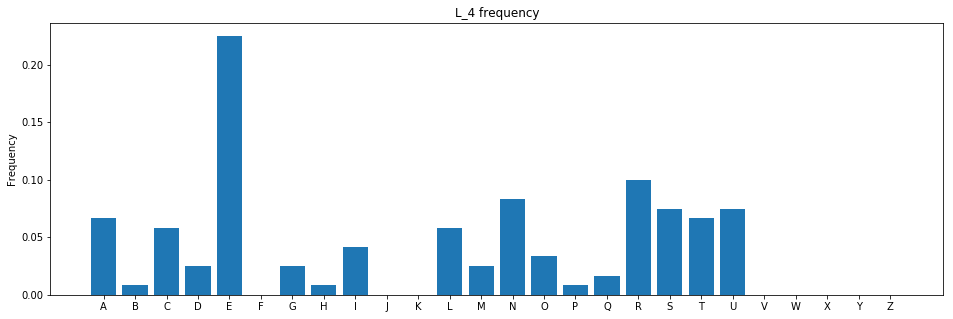

In [11]:
def plot_alphabet_frequency(alph, name):
    plt.figure(figsize=(16,5))
    plt.bar([x[0] for x in alph], [x[1]/100 for x in alph])
    plt.ylabel('Frequency')
    plt.title('{} frequency'.format(name))

    plt.show()

plot_alphabet_frequency(english_frequency, 'English')

for key, cipher_alphabet in cipher_alphabets:
    plot_alphabet_frequency(cipher_alphabet, key)

By visual inspection of the frequencies, we must match the cipher letter frequency with the English letter frequency.

* The first letter of the key has a peak at `W`. Matching it with the plain letter `e`, indicates `S` is `L_0`.
* The second letter of the key has a peak at `G`. Matching it with the plain letter `e`, indicates `C` is `L_1`.
* The third letter of the key has a peak at `Y`. Matching it with the plain letter `e`, indicates `U` is `L_2`.
* The third letter of the key has a peak at `F`. Matching it with the plain letter `e`, indicates `B` is `L_3`.
* The third letter of the key has a peak at `E`. Matching it with the plain letter `e`, indicates `A` is `L_4`.

Therefore, the key is `SCUBA`.

In [12]:
cipher_key = 'SCUBA'

In [13]:
def decipher(cipher_text, key):
    def rotate(l, n):
        return l[-n:] + l[:-n]

    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    n = len(key)
    pain_text = ''
    
    for i, cipher_letter in enumerate(cipher_text):
        k = i % n
        key_letter = key[k]
        key_pos = letters.find(key_letter)
        vigenere_alphabet = rotate(letters, -key_pos)
        cipher_letter_pos = vigenere_alphabet.find(cipher_letter)
        plain_letter = letters[cipher_letter_pos]
        pain_text += plain_letter

    return pain_text

In [14]:
print(decipher(cipher_text, cipher_key))

SOUVENTPOURSAMUSERLESHOMMESDEQUIPAGEPRENNENTDESALBATROSVASTESOISEAUXDESMERSQUISUIVENTINDOLENTSCOMPAGNONSDEVOYAGELENAVIREGLISSANTSURLESGOUFFRESAMERSAPEINELESONTILSDEPOSESSURLESPLANCHESQUECESROISDELAZURMALADROITSETHONTEUXLAISSENTPITEUSEMENTLEURSGRANDESAILESBLANCHESCOMMEDESAVIRONSTRAINERACOTEDEUXCEVOYAGEURAILECOMMEILESTGAUCHEETVEULELUINAGUERESIBEAUQUILESTCOMIQUEETLAIDLUNAGACESONBECAVECUNBRULEGUEULELAUTREMIMEENBOITANTLINFIRMEQUIVOLAITLEPOETEESTSEMBLABLEAUPRINCEDESNUEESQUIHANTELATEMPETEETSERITDELARCHERBAUDELAIREEXILESURLESOLAUMILIEUDESHUEESLEMOTPOURETAGEQUATREESTTRAJANSESAILESDEGEANTLEMPECHENTDEMARCHER


It is the poem L'Albatros (The Albatross) by Charles Baudelaire
https://fleursdumal.org/poem/200

In [15]:
# Souvent, pour s'amuser, les hommes d'équipage
# Prennent des albatros, vastes oiseaux des mers,
# Qui suivent, indolents compagnons de voyage,
# Le navire glissant sur les gouffres amers.
#
# À peine les ont-ils déposés sur les planches,
# Que ces rois de l'azur, maladroits et honteux,
# Laissent piteusement leurs grandes ailes blanches
# Comme des avirons traîner à côté d'eux.
#
# Ce voyageur ailé, comme il est gauche et veule!
# Lui, naguère si beau, qu'il est comique et laid!
# L'un agace son bec avec un brûle-gueule,
# L'autre mime, en boitant, l'infirme qui volait!
#
# Le Poète est semblable au prince des nuées
# Qui hante la tempête et se rit de l'archer;
# Exilé sur le sol au milieu des huées,
# Ses ailes de géant l'empêchent de marcher.